## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Check for similar columns between the two csv files
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [5]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [6]:
# Combine the data into a single dataset
pyma_merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
pyma_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice
mice = pyma_merged_df['Mouse ID'].value_counts()
print(f'There are {len(mice)} mice in all.')

There are 249 mice in all.


In [8]:
# Sort by Mouse ID to begin analyzing for duplicates
sorted_pyma_merged_df = pyma_merged_df.sort_values(by=['Mouse ID', 'Timepoint'])
sorted_pyma_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
dupl_timepoints_for_mouse = pyma_merged_df.duplicated(subset=['Mouse ID', 'Timepoint']).any()

print(f'It is "{dupl_timepoints_for_mouse}" that there is a Mouse ID with duplicated timepoints.')

# Locate the Mouse IDs where timepoints are duplicated.
dupl_mouse = pyma_merged_df.loc[pyma_merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
dupl_mouse
print('Duplicate concerns include')
print(dupl_mouse)

It is "True" that there is a Mouse ID with duplicated timepoints.
Duplicate concerns include
909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [10]:
# View the area of the data where concerns are identified for duplicates (around index 909)
pyma_merged_df.iloc[905:925,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1


In [11]:
# Retrieve all the data for the duplicate mouse ID (displayed in a data frame) 

# Use loc to pull the results for mouse id g989                              
locations = pyma_merged_df.loc[pyma_merged_df['Mouse ID'] == 'g989']
locations

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Retrieve all the data for the duplicate mouse ID (displayed in a data frame) 
# Use loc to pull the data for mouse id g989
dupl_mouse_data_df = pyma_merged_df.loc[pyma_merged_df['Mouse ID'] == 'g989', [
    'Drug Regimen',
    'Sex',
    'Age_months', 
    'Weight (g)',
    'Timepoint',
    'Tumor Volume (mm3)',
    'Metastatic Sites'
]]

dupl_mouse_data_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,Propriva,Female,21,26,0,45.000000,0
909,Propriva,Female,21,26,0,45.000000,0
910,Propriva,Female,21,26,5,48.786801,0
911,Propriva,Female,21,26,5,47.570392,0
912,Propriva,Female,21,26,10,51.745156,0
913,Propriva,Female,21,26,10,49.880528,0
914,Propriva,Female,21,26,15,51.325852,1
915,Propriva,Female,21,26,15,53.442020,0
916,Propriva,Female,21,26,20,55.326122,1
917,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
pyma_df = pyma_merged_df.drop(pyma_merged_df[pyma_merged_df['Mouse ID'] == 'g989'].index)

pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(pyma_df['Mouse ID'].value_counts())
print(f'After duplicate concerns were removed, there are {total_mice} mice for analysis.')

After duplicate concerns were removed, there are 248 mice for analysis.


In [15]:
# pyma_cleaned_df = pyma_df.set_index('Mouse ID')
# pyma_cleaned_df

# once index is set Mouse ID became an object that couldn't be used for 
# identifying the duplicate - # would the data be able to be grouped by if it's the index?

# Keeping code in case there's a reason I will want to reset index*************************

In [16]:
pyma_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Start with a Groupby using the Drug Regimen column
pyma_regimens = pyma_df.groupby(['Drug Regimen'])

# View that the data grouped by Drug Regimen
pyma_regimens.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [18]:
pyma_df.describe()
# Want to remove this

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [19]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
pyma_regimens = pyma_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_mean = pyma_regimens.mean()
tumor_median = pyma_regimens.median()
tumor_variance = pyma_regimens.var()
tumor_stdev = pyma_regimens.std()
tumor_sem = pyma_regimens.sem()

In [20]:
# Is there something I should do differently to display Tumor vol as a header for the chart
# similar to the agg dataframe -
# pyma_regimens_method2.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

In [21]:
# Assemble the resulting series into a single summary dataframe
tumor_stats_summary_df = pd.DataFrame({
    'Tumor Volume Mean':tumor_mean,
    'Tumor Volume Median':tumor_median,
    'Tumor Volume Variance':tumor_variance,
    'Tumor Volume Standard Deviation':tumor_stdev,
    'Tumor Volume Standard Error of Mean':tumor_sem   
})

# View the tumor volume statistical summary data frame
tumor_stats_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pyma_regimens_method2 = pyma_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
pyma_regimens_method2.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pyma_regimens = pyma_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Using the aggregation method, produce the same summary statistics in a single line
pyma_regimens.agg(['count', 'mean', 'median', 'var', 'std', 'sem'])

,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [24]:
pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Start by grouping by Drug Regimen and display the count of the number of times samples were measured for each
drug_regimens_grouped = pyma_df.groupby(['Drug Regimen'])
count_samples = drug_regimens_grouped['Drug Regimen'].count()

# View the count per Drug Regimen
count_samples
# Filter the data frame down to those columns to chart and group by drug regimen
# measurements_taken_df = pyma_df[["Drug Regimen", "Timepoint"]]
# measurements_taken_grouped = pyma_df.groupby('Drug Regimen').Timepoint

# measurements_taken_df = measurements_taken_df.set_index("Drug Regimen")
# measurements_taken_df = measurements_taken_df.set_index("Drug Regimen")

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


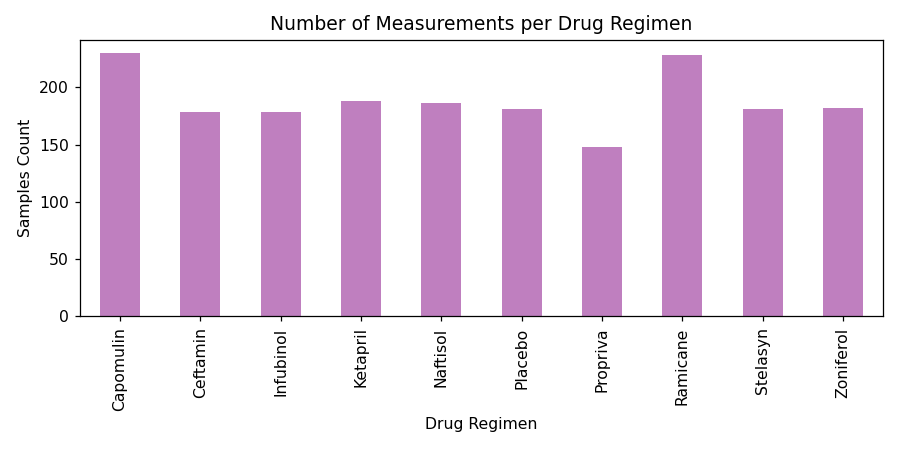

In [26]:
# Make a Pandas bar plot out of this info
count_chart = count_samples.plot(kind='bar', facecolor='purple', alpha=0.50, figsize=(8,4))

# Add title and labels
plt.title('Number of Measurements per Drug Regimen')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Samples Count')

# Modify layout for drug regimens to show, and view the bar chart
plt.tight_layout()

plt.show()

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Use setup like above to group by Drug Regimen
#drug_regimens_grouped = pyma_df.groupby(['Drug Regimen'])
#count_samples = drug_regimens_grouped['Drug Regimen'].count()

# View the count per Drug Regimen
#count_samples

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#x_axis = np.arange(len(drug_regimens_grouped)+1)                  
#tick_locations = [value for value in x_axis]

#tick_locations


In [29]:
# 
#plt.figure(figsize=(8,4))
#plt.bar(x_axis, count_samples)
#plt.xticks(tick_locations, drug_regimens_grouped, rotation="vertical")
#plt.tight_layout()

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [32]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
